<a href="https://colab.research.google.com/github/Leonardodarienzo/GeoPandas/blob/main/RelazioniSpaziali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gdp

In [ ]:
countries = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

In [ ]:
belgium = countries.plot(figsize=(12,6))

In [ ]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()
belgium

In [ ]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].item()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()
paris

In [ ]:
from shapely.geometry import LineString
line = LineString([paris, brussels])
line

In [ ]:
gdp.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [ ]:
brussels.within(belgium)

In [ ]:
belgium.contains(brussels)

In [ ]:
countries[countries.contains(paris)]

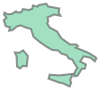

In [ ]:
Italy = countries.loc[countries['name'] == 'Italy', 'geometry'].item()
Italy

In [ ]:
cities[cities.within(Italy)]

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.item()
amazon

In [ ]:
countries[countries.crosses(amazon)].plot()

In [ ]:
ax = countries[countries.crosses(amazon)].plot()
amazon2 = rivers[rivers['name'] == 'Amazonas']
amazon2.plot(ax=ax, color = "white" , linewidth = 4)